In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Linear Regression

### Data

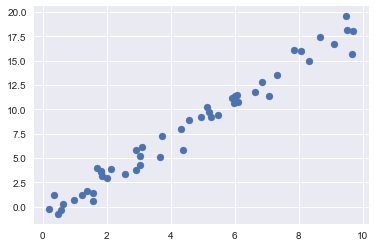

In [24]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = (2 * x) - 1 + rng.randn(50)
plt.scatter(x, y)

### Model

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
print(model)
X = x[:, np.newaxis]
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[1.9776566]
-0.9033107255311164


### Predict

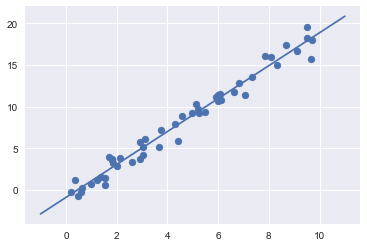

In [33]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)

# Gaussian Naive Bayes

### Data

In [34]:
iris = sns.load_dataset('iris')
iris.describe()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


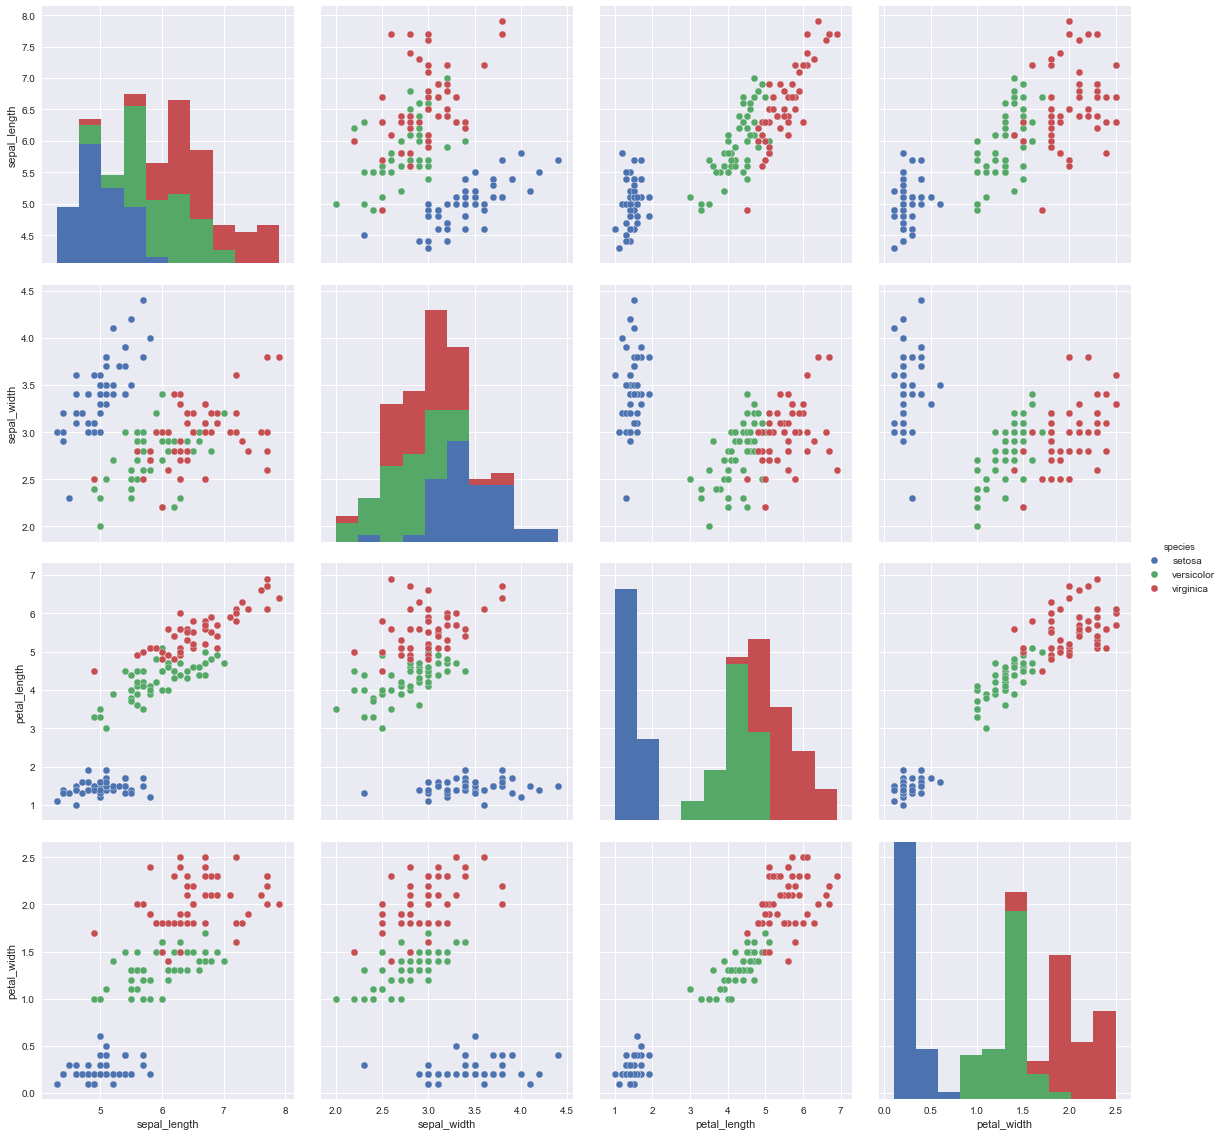

In [10]:
sns.set()
sns.pairplot(iris, hue = 'species', size = 4)

In [35]:
X_iris = iris.drop('species', axis = 1)
print(X_iris.shape)
y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


In [44]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(112, 4)
(38, 4)
(112,)
(38,)


### Model

In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
print(model)
model.fit(Xtrain, ytrain)
print(model.score(Xtrain, ytrain))

GaussianNB(priors=None)
0.9464285714285714


### Predict

In [48]:
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_model))

0.9736842105263158


# Principal Component Analysis (PCA)

### Model

In [71]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
print(model)
model.fit(X_iris)
print(model.score(X_iris))
X_2D = model.transform(X_iris)
print(X_2D.shape)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
-2.6997965106756645
(150, 2)


### Cluster

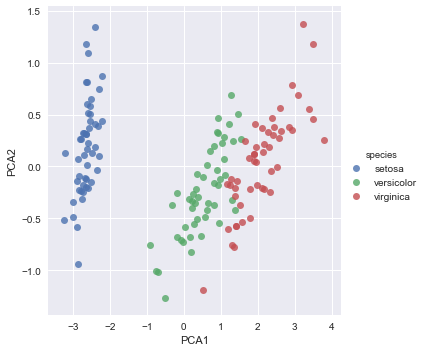

In [61]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg = False)

# Gaussian Mixture Model (GMM)

### Model

In [73]:
from sklearn.mixture import GMM
model = GMM(n_components = 3, covariance_type = 'full')
print(model)
model.fit(X_iris)
print(model.score(X_iris))

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)
[ 1.49448742e+00  6.75458210e-01  1.06800470e+00  8.58669951e-01
  1.33752512e+00 -1.25379832e-01  3.92302095e-02  1.55307606e+00
  1.93394988e-01  2.01505529e-01  7.86104548e-01  7.37457853e-01
  2.91777638e-01 -1.81192815e+00 -3.37014582e+00 -2.11834706e+00
 -1.03851814e+00  1.41238663e+00 -8.85574756e-01  9.11914345e-01
 -8.91245561e-01  4.31011571e-01 -3.74288530e+00 -1.72303887e+00
 -3.00818187e+00 -1.44718253e-01  5.19127912e-01  1.31506057e+00
  1.06430974e+00  6.48021566e-01  7.34193074e-01 -6.48656035e-01
 -2.00445104e+00 -9.14944118e-01  1.08603891e+00  8.80630991e-02
 -1.11091073e+00  2.46908780e-01  6.40723622e-02  1.43266153e+00
  9.11275900e-01 -4.39523305e+00 -3.88601502e-01 -3.98994226e+00
 -2.52250607e+00  6.41976094e-01  3.75804228e-01  9.63805019e-01
  1.10272328e+00  1.47023307e+00 -2.09674092e+00 -3.4819906

### Cluster

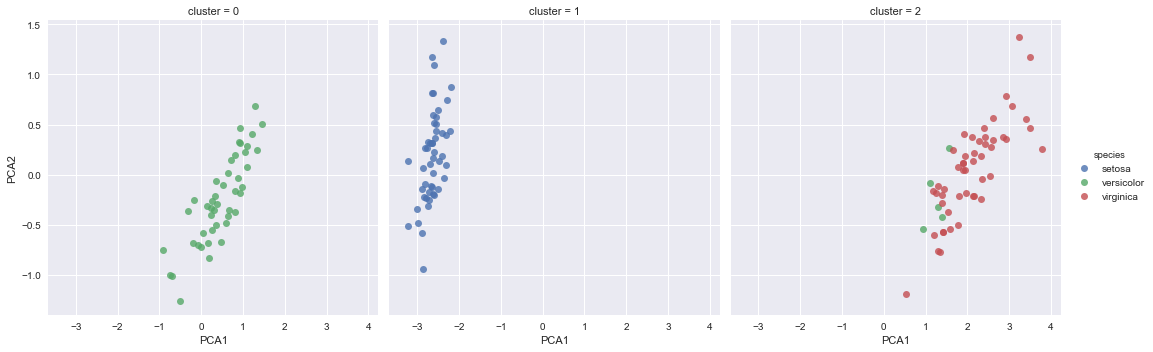

In [74]:
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', col = 'cluster', fit_reg = False)

# Manifold Learning (Isomap)

### Data

In [76]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


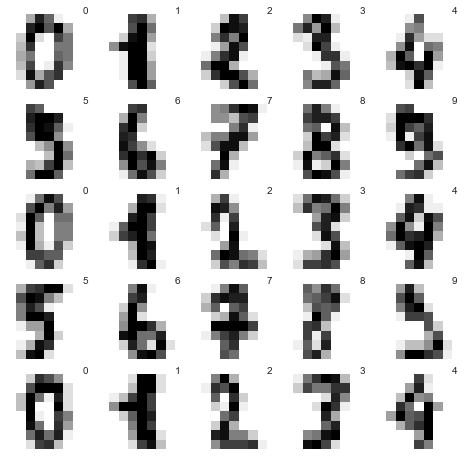

In [87]:
fig, axes = plt.subplots(5, 5, figsize = (8, 8), subplot_kw = {'xticks': [], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary')
    ax.text(1, 1, str(digits.target[i]), transform = ax.transAxes)

In [88]:
X = digits.data
print(X.shape)
y = digits.target
print(y.shape)

(1797, 64)
(1797,)


### Model

In [90]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
print(iso)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)
(1797, 2)


### Cluster

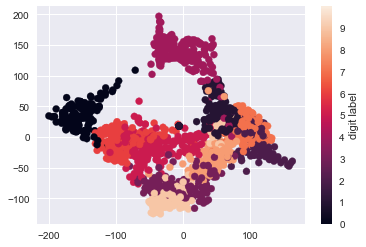

In [106]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target)
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(0, 10)

### Cluster